In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from keras.datasets import fashion_mnist



Este guia usa a base de dados Fashion MNIST que contém 70.000 imagens a preto e branco de 10 categorias diferentes. As imagens apresentam peças de roupa individuais com pouca resolução (28 por 28 píxeis), como podem ser vistas aqui:

![picture](https://drive.google.com/uc?id=14OL9Usm0FjgVQ64lbdPjmBXXs3RHp93-)

Este dataset é dividido em classes, conforme tabela abaixo:

![picture](https://drive.google.com/uc?id=13EC0_CzdrQSraBK9jmAZhtoMPohlCYDG)

Então, dada uma imagem de entrada, essas são nossas possíveis saídas de rótulo.

No total, o conjunto de dados Fashion MNIST contém ** 70.000 ** imagens, o que sem dúvida é suficiente para começarmos. Das 70.000 imagens, usaremos ** 60.000 delas para treinar a rede neural com as outras 10.000 sendo usadas para testar a rede neural **. Lembre-se também de que cada imagem é uma imagem de 28px x 28px, o que significa que existem 784 bytes. E assim, o trabalho seria simplesmente pegar os 784 bytes como entrada e então produzir um dos 10 itens diferentes de roupa que a imagem representa.

![picture]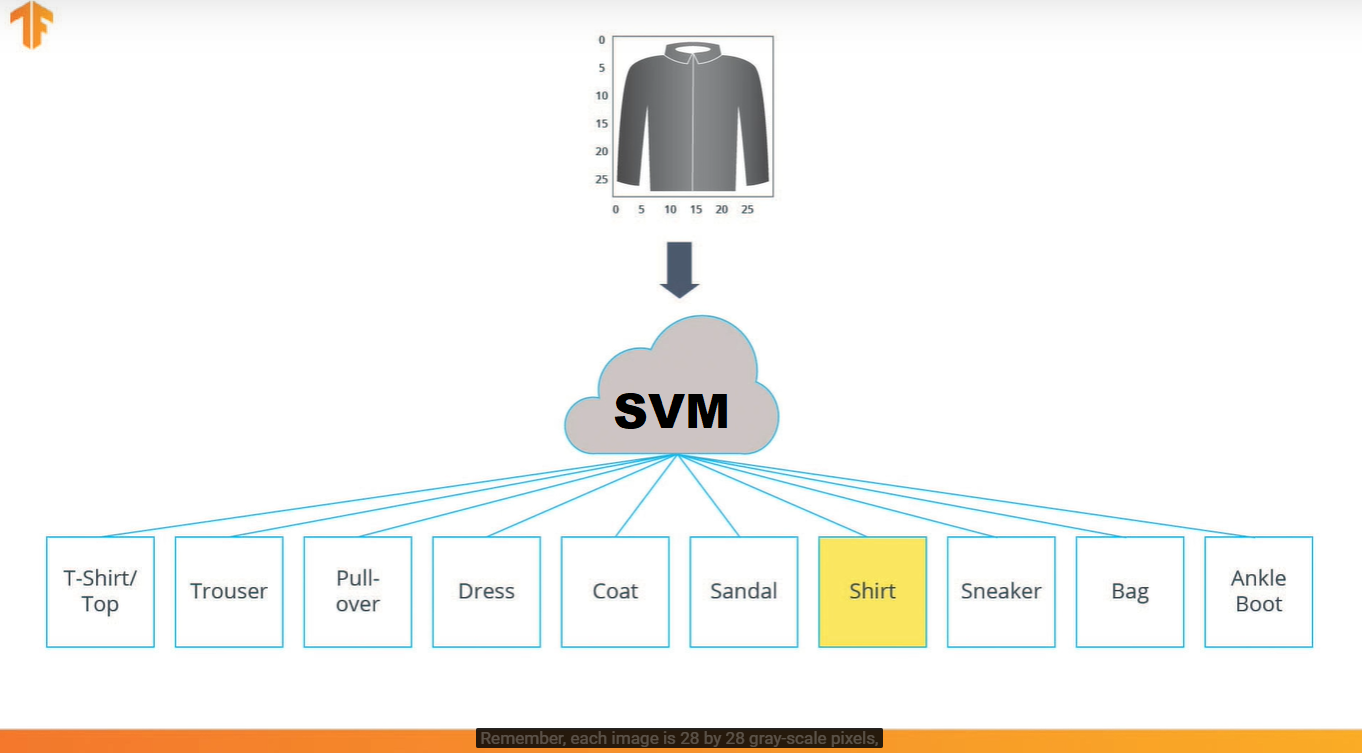

In [2]:
# Carregando o conjunto de dados Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()




4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Transformando as imagens em vetores unidimensionais
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

# Imprimindo o tamanho dos vetores de treinamento e teste
print("Tamanho do vetor de treinamento:", X_train.shape)
print("Tamanho do vetor de teste:", X_test.shape)



Tamanho do vetor de treinamento: (60000, 784)
Tamanho do vetor de teste: (10000, 784)


In [4]:
# Dividindo o conjunto de treinamento em conjunto de treinamento e conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [5]:
print("Tamanho do vetor de X_train:", X_train.shape)
print("Tamanho do vetor de y_train:", y_train.shape)
print("Tamanho do vetor de X_val:", X_val.shape)
print("Tamanho do vetor de y_val:", y_val.shape)

Tamanho do vetor de X_train: (48000, 784)
Tamanho do vetor de y_train: (48000,)
Tamanho do vetor de X_val: (12000, 784)
Tamanho do vetor de y_val: (12000,)


In [ ]:
# Definindo o classificador SVM com kernel linear
clf = svm.SVC(kernel='linear')
# Definindo o classificador SVM com kernel linear
#clf = svm.SVC(kernel='rbf')
print("treinando")
# Treinando o classificador SVM
clf.fit(X_train, y_train)


treinando


In [ ]:
print("realizando a etapa de teste")
# Fazendo as previsões no conjunto de validação
y_pred = clf.predict(X_val)



In [ ]:
# Calculando a acurácia e a matriz de confusão
accuracy = metrics.accuracy_score(y_val, y_pred)
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)




In [ ]:
# Exibindo a acurácia e a matriz de confusão
print("Acurácia:", accuracy)
print("Matriz de confusão:\n", confusion_matrix)



In [ ]:
# Exibindo 10 imagens do conjunto de dados com as previsões
fig, axs = plt.subplots(2, 5)
fig.suptitle('Previsões do SVM no Fashion Dataset')
for i in range(2):
    for j in range(5):
        idx = np.random.randint(len(X_val))
        img = np.reshape(X_val[idx], (28, 28))
        axs[i,j].imshow(img, cmap='gray')
        axs[i,j].set_title("Previsto: %d\nReal: %d" % (y_pred[idx], y_val[idx]))
        axs[i,j].axis('off')

plt.show()